##### **Disclaimer: We use some advanced packages here without detailed explanation. You can use these, but we do not provide any support.**

In [54]:
# To install them, you can uncomment the following lines:
# (%pip will call pip from the currently active python environment)

# Note: Some of these packages are still not compatible with Python 3.12 yet
# %pip install sweetviz
# %pip install ydata_profiling
# %pip install shap

In [55]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('data/recipes.csv')

# drop all tables except RecipeId, RecipeIngredientParts
df = df[['RecipeId', 'RecipeIngredientParts']]
df.head()
df.info()

# iterate over all RecipeIngredientParts and extract the ingredients uniquely
ingredients = set()
for row in df.itertuples():
    for ingredient in row.RecipeIngredientParts.split(','):
        ingredients.add(ingredient.strip())

# remove all c("\", "(", ")") and c"" and ""
ingredients = [ingredient.replace('\\', '').replace('(', '').replace(')', '').replace('c""', '').replace('""', '').replace('"', '').strip() for ingredient in ingredients]

# now merge all ingredients into one string
ingredients_string = ','.join(ingredients)
print(ingredients_string)

# replace all , with " " and split the string into a list
ingredients_list = ingredients_string.replace(',', ' ').split(' ')

print(ingredients_list)

# create a set to remove all duplicates
unique_ingredients = set(ingredients_list)
print(unique_ingredients)
print(len(unique_ingredients))

# export it into a text file
with open('data/unique_ingredients.txt', 'w') as f:
    for item in unique_ingredients:
        f.write("%s\n" % item)

# # export the unique ingredients to an Excel file
# df_unique_ingredients = pd.DataFrame({'Ingredient': list(unique_ingredients)})
# df_unique_ingredients.to_excel('data/unique_ingredients.xlsx', index=False)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RecipeId               75604 non-null  int64 
 1   RecipeIngredientParts  75604 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB
cannellini beans,chili peppers,new potatoes,grapefruit sections,miniature marshmallow,ducks,green bananas,dark raisin,frozen blueberries,candied pecans,black cod steaks,frozen carrots,trassi oedang,cumin seeds,dried prune,plain gelatin,white chocolate,light margarine,brazil nuts,caster sugar,date honey,unsifted flour,Peppered Pork Loin,english walnuts,taleggio,water-packed artichoke hearts,fenugreek leaves,irish potato,large marshmallows,Italian sausage,beef brisket,Chinese five spice powder,jalapeno havarti cheese,Homemade Powdered Sugar With Splenda and Glazes,light coconut milk,sweet Italian sausage links,salsa,mango rum,Mexica

WJ recepies remarks

In [56]:

import pandas as pd

# Read the CSV file
df = pd.read_csv('data/recipes.csv')

# Consolidated Non-Vegetarian Keywords
non_vegetarian_keywords = list(set([
    'flounder', 'lobsters', 'lump', 'rack', 'shank', 'steak', 'scallops', 'alligator', 
    'livers', 'roe', 'ham', 'turkey', 'chicken', 'duck', 'bacon', 'tuna', 'swordfish', 
    'lobster', 'meatballs', 'salmon', 'sweetbreads', 'breasts', 'chicken-flavored', 
    'ducklings', 'drumstick', 'liver', 'shanks', 'rabbit', 'poultry', 'herring', 
    'mussels', 'clams', 'squid', 'pork', 'veal', 'haddock', 'chorizo', 'chihuahua', 
    'eel', 'stuffing', 'cod', 'gelatin', 'sausage', 'curd', 'thighs', 'lox', 'cabbage', 
    'wonton', 'bone', 'giblets', 'pheasant', 'quail', 'shrimp', 'fish', 'sole', 
    'gizzard', 'Canadian', 'pesto', 'truffles', 'anchovies', 'venison', 'pheasants', 
    'tenderloin', 'meats', 'tripe', 'breast', 'wings', 'ribs', 'sausages', 'trout', 
    'oysters', 'octopus', 'crab', 'prawns', 'catfish', 'sardines', 'mahi', 'halibut', 
    'bass', 'perch', 'tilapia', 'grouper'
]))

# Consolidated Non-Vegan Keywords
non_vegan_keywords = list(set([
    'milk', 'cheese', 'butter', 'egg', 'honey', 'mozzarella-cheddar', 'cream', 'whip', 
    'jarlsberg', 'fontina', 'ham', 'cheesecake', 'hollandaise', 'caviar', 'creamRegular', 
    'custard', 'yogurt', 'gouda', 'margarine', 'beef', 'salmon', 'sour', 'bisquick', 
    'carton', 'cotija', 'creme', 'buttercream', 'buttermilk', 'ricotta', 'cottage', 
    'eggs', 'mayonnaise', 'eggshells', 'lactose-free', 'skim', 'ghee', 'mascarpone', 
    'alfredo', 'whey', 'casein', 'lactose', 'albumin', 'bechamel', 'sour cream', 
    'cream cheese', 'feta', 'gorgonzola', 'parmesan', 'mozzarella', 'cheddar', 'brie', 
    'camembert', 'roquefort', 'stilton', 'blue cheese', 'colby', 'monterey jack', 
    'swiss cheese', 'provolone', 'edam', 'havarti', 'pecorino', 'asiago', 'emmental', 
    'gruyere', 'halloumi', 'manchego', 'paneer', 'queso fresco', 'ricotta salata', 
    'romano', 'taleggio', 'vacherin', 'milk chocolate', 'whey protein', 'casein protein', 
    'egg noodles', 'egg whites', 'egg yolks', 'hollandaise sauce', 'aioli', 'flan', 
    'quiche', 'meringue', 'pavlova', 'egg wash', 'frittata', 'omelette', 'scrambled eggs', 
    'poached eggs', 'hard-boiled eggs', 'deviled eggs', 'eggnog', 'brioche', 'challah', 
    'pound cake', 'sponge cake', 'angel food cake', 'ladyfingers', 'mousse', 'souffle', 
    'creme brulee', 'panna cotta', 'tiramisu', 'yorkshire pudding', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'gravlax', 'smoked salmon', 'caviar', 'anchovy paste', 
    'fish stock'
]))


# Function to check if a RecipeIngredientParts is vegetarian
def is_vegetarian(ingredient):
    for keyword in non_vegetarian_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Function to check if a RecipeIngredientParts is vegan
def is_vegan(ingredient):
    for keyword in non_vegan_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Apply the is_vegetarian function to the RecipeIngredientParts column
df['is_vegetarian'] = df['RecipeIngredientParts'].apply(is_vegetarian)

# Apply the is_vegan function to the RecipeIngredientParts column
df['is_vegan'] = df['RecipeIngredientParts'].apply(is_vegan)

# Map the diet category based on the is_vegetarian and is_vegan columns
df['diet_category'] = df.apply(lambda row: 'Vegetarian' if row['is_vegetarian'] else 'Vegan' if row['is_vegan'] else 'Omnivore', axis=1)

# Print the dataframe with the added is_vegetarian, is_vegan, and diet_category columns
print(df)

# Get unique values from the RecipeIngredientParts column
unique_values = df['RecipeIngredientParts'].unique()

# Print the unique values
print(unique_values)

# Count the unique values
print(len(unique_values))

       RecipeId                                            Name  CookTime   
0         73440                    Bow Ties With Broccoli Pesto         0  \
1        365718                             Cashew-chutney Rice      3600   
2        141757        Copycat Taco Bell Nacho Fries BellGrande      3600   
3        280351        Slow Cooker Jalapeno Cheddar Cheese Soup     18000   
4        180505                 Cool & Crisp Citrus Chiffon Pie      3600   
...         ...                                             ...       ...   
75599    253577  Frijoles Negros- Crock Pot Mexican Black Beans     43200   
75600    267827                                  Moose Moussaka      3600   
75601    266983        Cantonese Pepper Steak for Two (Or More)      1800   
75602    253739                            Coconut Cream Cooler       300   
75603     78171                                 Cheater Risotto       960   

       PrepTime RecipeCategory   
0          1800          Other  \
1      

## CRISP-DM

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
import shap
from ydata_profiling import ProfileReport
import sweetviz as sv

This toy example serves to give a first impression of how a CRISP-DM adhering 
data science project could be implemented. CRISP-DM 

<img src="crisp_dm.png" width="500">

#### Reproducibility 

A best practice in data analytics projects is to work with *seeds* to ensure the reproducability of results. 
This is especially important in the Analytics Cup, since the rules require you to write a self-contained
script that produces reproducable results. 

To achieve this, we can set seeds for all used random number generators.

In [58]:
seed = 2024

# pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy
np.random.seed(seed)

### Phase 1: Business Understanding

Business Understanding is the first and economically most important step in the
CRISP-DM process. It serves to assess use cases, feasibility, requirements, and
risks of the endeavored data driven project. Since the conduction of data driven
projects usually depends on the data at hand, the CRISP-DM process often 
alternates between Business Understanding and Data Understanding, until the
project's schedule becomes sufficiently clear.

#### Example: Business Understanding

In our toy example, we want to provide a service to customers that can identify 
iris flowers. The use case could be an automatic price assignment to flowers sold
at a shop, because some varieties of the flower could be more rare and thus more
expensive. This would save huge amounts of manual labour and associated costs. 
In this example, assume that the Business Understanding part has already been 
iterated sufficiently often, such that the project plan is clear: 

Train a suitable model (classifier) that can distinguish iris flower varieties. 
The data that you need to achieve the task has already been collected for you 
and is fully provided in a .csv file.

### Phase 2: Data Understanding

The *Data Understanding* phase mainly serves to inform the Business Understanding step by
assessing the data quality and content, and should provide the engineers with 
an intuition for the specific data and the specific problem at hand. Experienced
data scientists and machine learning engineers can often estimate the difficulty
and feasibility of the task by analyzing and understanding the data.  

#### Example: Data Understanding

Make yourself familiar with the structure and content of the data. *Note*, this step 
heavily depends on the specific problem at hand, since there is no fixed recipe that 
fits all possible data sets. In the example below, we are only looking at a very small
data set and do **not** conduct an in-depth analysis.  

In [59]:
# load the data
file_path = "data/recipes.csv"
#file_path = "iris_dataset.csv"
df = pd.read_csv(file_path)

In [60]:
# have a look at the data and its attributes
print(df.sample(10))
print(df.info())
# check if columns are properly named
# --> named properly, like written in Data Description.pdf, all columns are separate 

       RecipeId                                              Name  CookTime   
30486     29263               Chicken Soup &quot;old School&quot;      3600  \
2106      88290                                  Black Rice Salad       960   
37773    164760  Grilled Ham and Cheese Sandwich With Fresh Pears       900   
72530     68908     Crock Pot Buffalo Chicken Pasta (Slow Cooker)     10800   
38578    492792                                 Asparagus Risotto      2400   
8617      69612                                  Tortellini Salad      1200   
72886     87379                   Applesauce Crazy Cake (No-Bowl)      1800   
58370     66320                       Hearty Beef Spaghetti Sauce      7200   
6161     133767                     Olive Garden Seafood Torcello      1500   
36207     25653          Moroccan Chicken and Summer Squash Salad       600   

       PrepTime RecipeCategory   
30486      1800          Other  \
2106       1200          Other   
37773       900          Lun

In [61]:
import ast
# get a general overview over data, check for missing values, etc.
#print(df.info())

# --> we have 75604 rows, 18 columns, the attributes' dtype are like specifided in Data Description.pdf 

""" Converting dtype and values checking 
1. RecipeCategory                   -> Categorical 
2. RecipeIngredientQuantities       -> not very useful str content -> might not need this column
3. RecipeIngredientParts            -> not very useful str content -> might not need this column
4. RecipeServings                   -> int64
5. RecipeServings and RecipeYield   -> has missing value 
"""

"""1. RecipeCategory from dtype: object to dtype: category"""
df["RecipeCategory"] = df["RecipeCategory"].astype("category")



"""4. RecipeServings from dtype: float64 to dtype: int64"""
print("------------------------------------------------------------------------------------------------------")
print("check if each entry of RecipeServings is a whole number")
whole_number = True
for i in range(len(df)):
    if pd.isna(df["RecipeServings"][i]):
        continue
    if df["RecipeServings"][i] % 1 != 0:
        print(df["RecipeServings"][i])
        whole_number = False
        break
print(whole_number)
## convert dtype: float64 to dtype: int64
df["RecipeServings"] = df["RecipeServings"].astype("Int64")



""" 2. Tried to convert RecipeIngredientQuantities to Array[int64] but seem like does not necessary """
def convert_RecipeIngredientQuantities(one_RecipeIngredientQuantitie_entry): 
    ## convert string: c("\"6\"", "\"2\"", "\"1 1/2\"", "\"1/4\"") to list of number: [6, 2, 1.5, 0.25]
    ## Problem: there is also string like this: c("\"2 1/2 - 3\"", "\"2\"") 
    ingredient_quantities_list = one_RecipeIngredientQuantitie_entry.replace("c(", "").replace(")", "").replace("\"", "").replace("\\", "").split(",")
    converted_ingredient_quantities_list = []
    for quantities in ingredient_quantities_list: 
        quantities = quantities.strip().split(" ")
        number = 0.0
        for num in quantities:
            if "/" in num:
                num = num.split("/")
                num = float(num[0]) / float(num[1])
            else:
                num = float(num)
            number += num
        converted_ingredient_quantities_list.append(number)
#df["RecipeIngredientQuantities"] = df["RecipeIngredientQuantities"].apply(convert_RecipeIngredientQuantities)



""" 2. 3. entries of RecipeIngredientQuantities and RecipeIngredientParts does not have the same length """ 
print("------------------------------------------------------------------------------------------------------")
print("check if RecipeIngredientQuantities and RecipeIngredientParts have the same length")
same_length = True
for i in range(len(df)):
    quantities = df["RecipeIngredientQuantities"][i].split(",")
    parts = df["RecipeIngredientParts"][i].split(",")
    if len(quantities) != len(parts):
        same_length = False
        print(len(quantities), quantities)
        print(len(parts), parts)
        break
print(same_length)


#print("------------------------------------------------------------------------------------------------------")
#print(df.info())

------------------------------------------------------------------------------------------------------
check if each entry of RecipeServings is a whole number
True
------------------------------------------------------------------------------------------------------
check if RecipeIngredientQuantities and RecipeIngredientParts have the same length
7 ['c("\\"1\\""', ' "\\"3/4\\""', ' "\\"6\\""', ' "\\"5\\""', ' "\\"2\\""', ' "\\"1\\""', ' "\\"2\\"")']
9 ['c("\\"celery\\""', ' "\\"onion\\""', ' "\\"butter\\""', ' "\\"chicken broth\\""', ' "\\"long grain rice\\""', ' "\\"unsalted cashews\\""', ' "\\"chutney\\""', ' "\\"salt\\""', ' "\\"pepper\\"")']
False


In [62]:
# correlation matrix for numerical attributes
df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
corr

,RecipeId,CookTime,PrepTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
RecipeId,1.000000,-0.001873,0.001925,-0.003799,-0.004225,-0.004152,0.000161,0.003686,-0.000663,0.001449,0.000931,-0.003063,-0.004522
CookTime,-0.001873,1.000000,0.033078,0.011805,-0.001364,-0.001544,0.000789,0.007389,0.028091,0.010959,0.042300,-0.000579,0.035897
PrepTime,0.001925,0.033078,1.000000,0.012205,-0.000277,-0.000822,-0.001342,0.010013,0.029069,0.010279,0.038336,-0.000874,0.063483
Calories,-0.003799,0.011805,0.012205,1.000000,0.966243,0.953667,0.881867,0.154252,0.434286,0.271091,0.379796,0.910026,-0.012984
FatContent,-0.004225,-0.001364,-0.000277,0.966243,1.000000,0.981042,0.880081,0.117605,0.205991,0.137423,0.180419,0.925492,-0.010224
SaturatedFatContent,-0.004152,-0.001544,-0.000822,0.953667,0.981042,1.000000,0.892156,0.109474,0.211155,0.120341,0.193711,0.921987,-0.009536
CholesterolContent,0.000161,0.000789,-0.001342,0.881867,0.880081,0.892156,1.000000,0.120591,0.240076,0.145259,0.224276,0.888566,-0.011758
SodiumContent,0.003686,0.007389,0.010013,0.154252,0.117605,0.109474,0.120591,1.000000,0.156050,0.170551,0.111118,0.143150,-0.004065
CarbohydrateContent,-0.000663,0.028091,0.029069,0.434286,0.205991,0.211155,0.240076,0.156050,1.000000,0.584683,0.894220,0.130685,-0.007960
FiberContent,0.001449,0.010959,0.010279,0.271091,0.137423,0.120341,0.145259,0.170551,0.584683,1.000000,0.356476,0.134292,-0.009477


In [63]:
# have a look at common statistics of the dataset
print(df.describe())
#sns.boxplot(df);

""" CHECK STATISTIC AND BALENCING OF CLASSES/LABELS (next cell) """


            RecipeId      CookTime      PrepTime       Calories    FatContent   
count   75604.000000  7.560400e+04  7.560400e+04   75604.000000  75604.000000  \
mean   188832.754338  5.490711e+03  3.158604e+03     487.577339     24.781641   
std    136977.010271  1.043468e+05  8.656302e+04    1496.382893    119.775608   
min        40.000000  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%     70903.500000  6.000000e+02  6.000000e+02     174.700000      5.600000   
50%    160469.000000  1.200000e+03  9.000000e+02     318.100000     13.700000   
75%    289503.750000  2.700000e+03  1.200000e+03     530.400000     27.500000   
max    541195.000000  1.036800e+07  1.728000e+07  350473.100000  30123.700000   

       SaturatedFatContent  CholesterolContent  SodiumContent   
count         75604.000000        75604.000000   75604.000000  \
mean              9.668810           87.716481     765.186763   
std              52.503124          373.442901    3579.268318   
min       

' CHECK STATISTIC AND BALENCING OF CLASSES/LABELS (next cell) '

how many percent of CookTime is more than 1 days?
0.5211364478069943 %


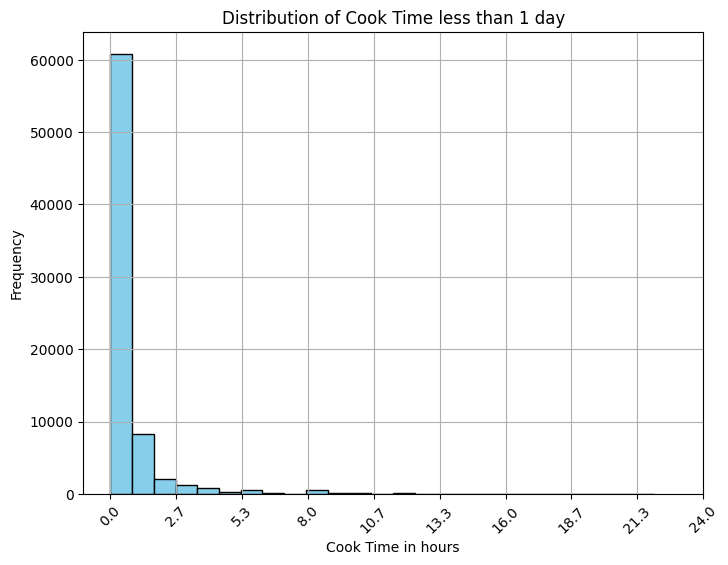

how many percent of CookTime is more than 0.15 days?
4.337072112586635 %


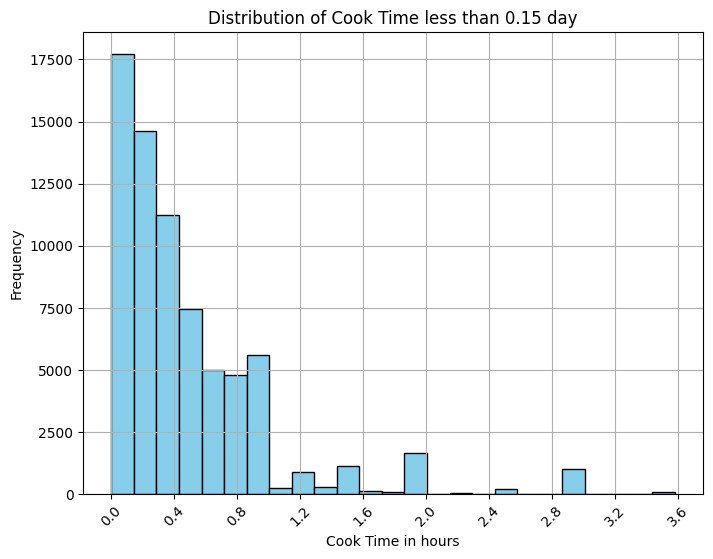

In [64]:

"""
1. CookTime: (unit is in seconds)
    * min = 0.0 seconds : appears most frequently (15.58%)  -> this is like missing value
    * mean = 5.490711e+03 seconds = 1.53 hours 
    * only 0.52% is more than 1 day
    * 4.3% is more than 0.15 day = 3.6 hours
"""

days_list = [1, 0.15]
for days in days_list:
    in_seconds = days * 24 * 60 * 60
    print("how many percent of CookTime is more than", days, "days?")
    print(len(df[df["CookTime"] >= in_seconds]) / len(df) * 100, "%")

    # filter out all recipes with a cook time of more than "days" day and plot the distribution
    df_cookTime = df[df["CookTime"] < in_seconds]

    plt.figure(figsize=(8, 6))
    plt.hist(df_cookTime['CookTime'], bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Cook Time in hours')
    plt.ylabel('Frequency')
    plt.title('Distribution of Cook Time less than ' + str(days) + ' day')
    plt.xticks(rotation=45)
    plt.gca().set_xticks(np.linspace(0, in_seconds, 10)) # set 10 ticks
    plt.gca().set_xticklabels(['{:.1f}'.format(x/3600) for x in plt.gca().get_xticks()]) # turns x axis to hours
    plt.grid(True)
    plt.show()


how many percent of PrepTime is 0 seconds?
2.932384529919052 %
how many percent of PrepTime is more than 6 hour?
1.0793079731231152 %


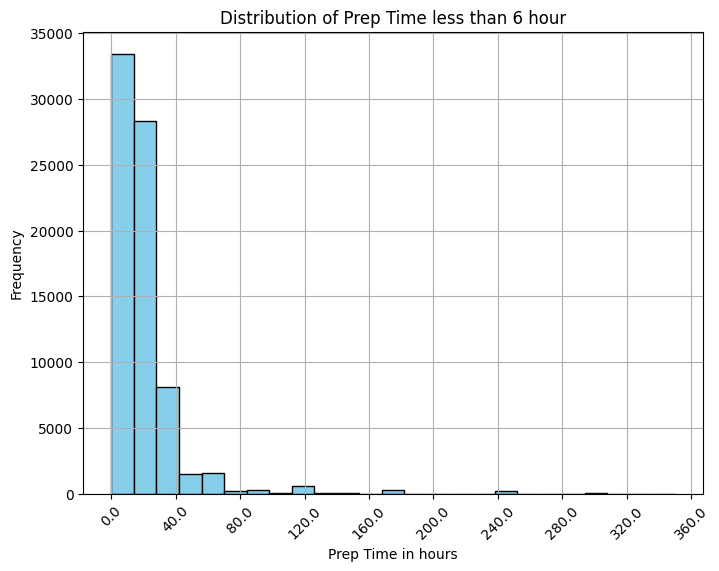

how many percent of PrepTime is more than 2.2 hour?
2.0713189778318606 %


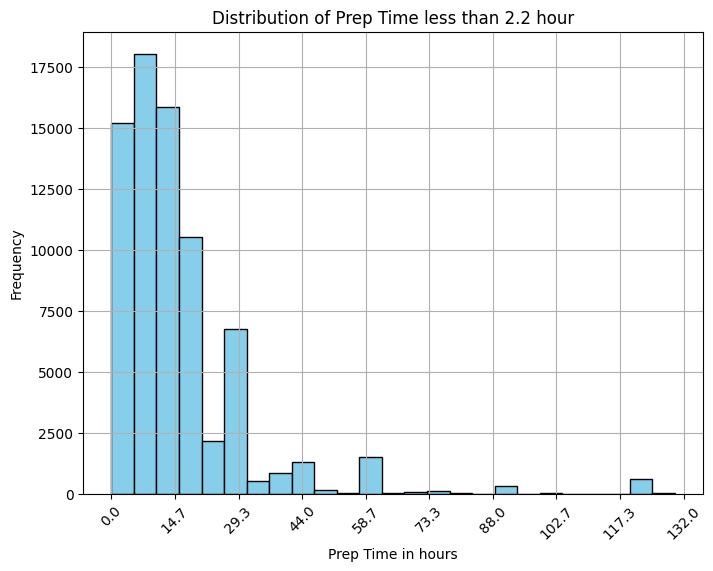

In [65]:
"""
2. PrepTime: (unit is in seconds)
    * min = 0.0 seconds : 2.9%  -> this is like missing value
    * mean = 3.158604e+03 seconds = 0.88 hours
    * max = 1.728000e+07 seconds = 4800 hours = 200 days
    
"""
print("how many percent of PrepTime is 0 seconds?")
print(len(df[df["PrepTime"] == 0]) / len(df) * 100, "%")


hours_list = [6, 2.2]
for hour in hours_list:
    in_seconds = hour * 60 * 60
    print("how many percent of PrepTime is more than", hour, "hour?")
    print(len(df[df["PrepTime"] >= in_seconds]) / len(df) * 100, "%")

    # filter out all recipes with a prep time of more than "hour" and plot the distribution
    df_PrepTime = df[df["PrepTime"] < in_seconds]

    plt.figure(figsize=(8, 6))
    plt.hist(df_PrepTime['PrepTime'], bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Prep Time in hours')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prep Time less than ' + str(hour) + ' hour')
    plt.xticks(rotation=45)
    plt.gca().set_xticks(np.linspace(0, in_seconds, 10)) # set 10 ticks
    plt.gca().set_xticklabels(['{:.1f}'.format(x/60) for x in plt.gca().get_xticks()]) # turns x axis to minutes
    plt.grid(True)
    plt.show()

how many percent of RecipeServings is nan?
35.33278662504629 %
after removing nan values
how many percent of RecipeServings is more than 50 servings?
0.760876234889857 %


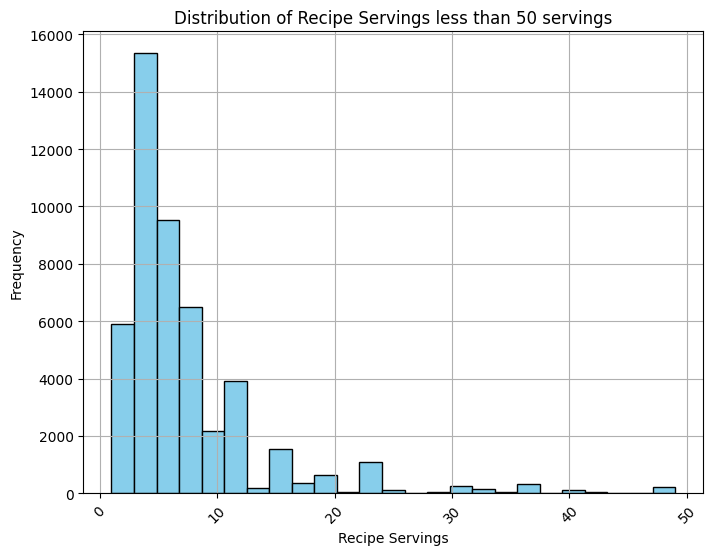

how many percent of RecipeServings is more than 30 servings?
2.3722665347595786 %


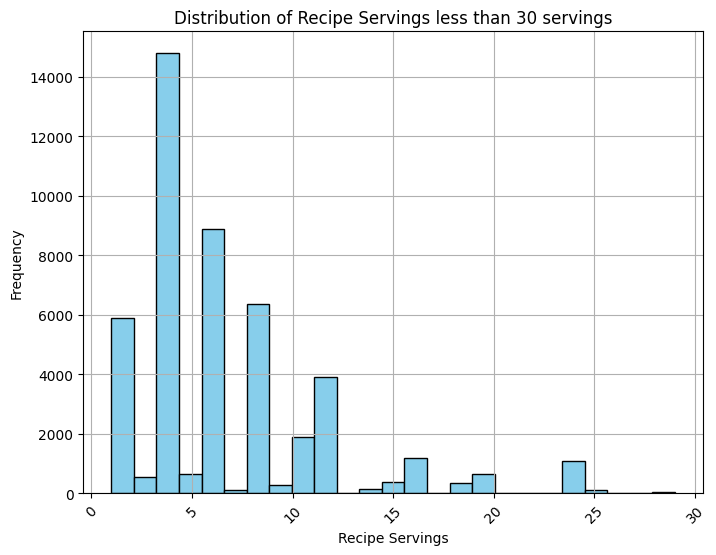

how many percent of RecipeServings is more than 20 servings?
4.12092551933795 %


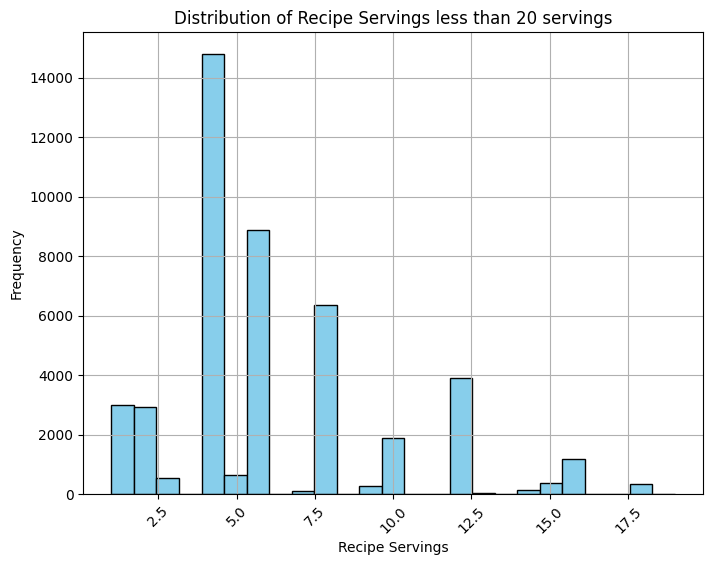

In [66]:
"""
4. RecipeServings:
  
"""

# remove nan values
print("how many percent of RecipeServings is nan?")
print(len(df[df["RecipeServings"].isna()]) / len(df) * 100, "%")
df_RecipeServings = df[df["RecipeServings"].notna()]
print("after removing nan values")

servings_list = [50, 30, 20]
for serving in servings_list:
    print("how many percent of RecipeServings is more than", serving, "servings?")
    print(len(df_RecipeServings[df_RecipeServings["RecipeServings"] >= serving]) / len(df_RecipeServings) * 100, "%")

    # filter out and plot the distribution
    df_RecipeServings = df_RecipeServings[df_RecipeServings["RecipeServings"] < serving]

    plt.figure(figsize=(8, 6))
    plt.hist(df_RecipeServings['RecipeServings'], bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Recipe Servings')
    plt.ylabel('Frequency')
    plt.title('Distribution of Recipe Servings less than ' + str(serving) + ' servings')
    plt.xticks(rotation=45)
    #plt.gca().set_xticks(np.linspace(0, serving, 10)) # set 10 ticks
    #plt.gca().set_xticklabels(['{:.1f}'.format(x/60) for x in plt.gca().get_xticks()]) # turns x axis to minutes
    plt.grid(True)
    plt.show()

Text(0.5, 1.0, 'RecipeCategory distribution')

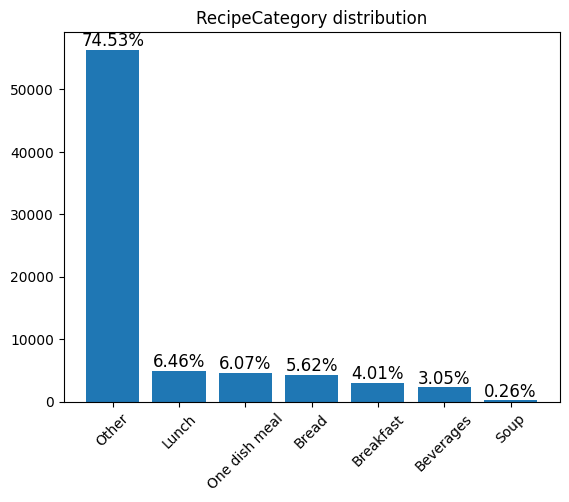

In [67]:
"""
4. RecipeCategory: 
    * Other is very big -> RecipeCategory should not play a big role in prediction 
"""

counts = df['RecipeCategory'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=45)
for i, v in enumerate(counts.values):
    plt.text(i, v, "{:.2f}%".format(v / len(df) * 100), ha="center", va="bottom", fontsize=12)
plt.title('RecipeCategory distribution')

In [68]:
# check the balancing of classes/labels
#print(df.groupby("PrepTime").size().sort_values(ascending=False))

# also print in percentage
#print(df.groupby("PrepTime").size().sort_values(ascending=False)/len(df)*100)


for col in df.columns:
    if col in ["RecipeId", "Name", "RecipeYield"]:  # skip RecipeId, Name, RecipeYield
        continue
    print(df.groupby(col).size().sort_values(ascending=False)/len(df)*100)
    print("------------------------------")

CookTime
0        15.582509
1800      9.568277
1200      9.270674
900       8.580234
600       8.294535
           ...    
8820      0.001323
26400     0.001323
26700     0.001323
67200     0.001323
59400     0.001323
Length: 246, dtype: float64
------------------------------
PrepTime
600         23.083435
900         20.625893
300         14.157981
1200        13.835247
1800         8.901645
              ...    
44100        0.001323
45000        0.001323
2640         0.001323
68400        0.001323
17280000     0.001323
Length: 166, dtype: float64
------------------------------
RecipeCategory
Other            74.529125
Lunch             6.463944
One dish meal     6.071107
Bread             5.616105
Breakfast         4.011693
Beverages         3.046135
Soup              0.261891
dtype: float64
------------------------------
RecipeIngredientQuantities
c("\"1\"", "\"1\"", "\"1\"")                                                                  0.279086
c("\"1\"", "\"1\"")              

KeyError: 'variety'

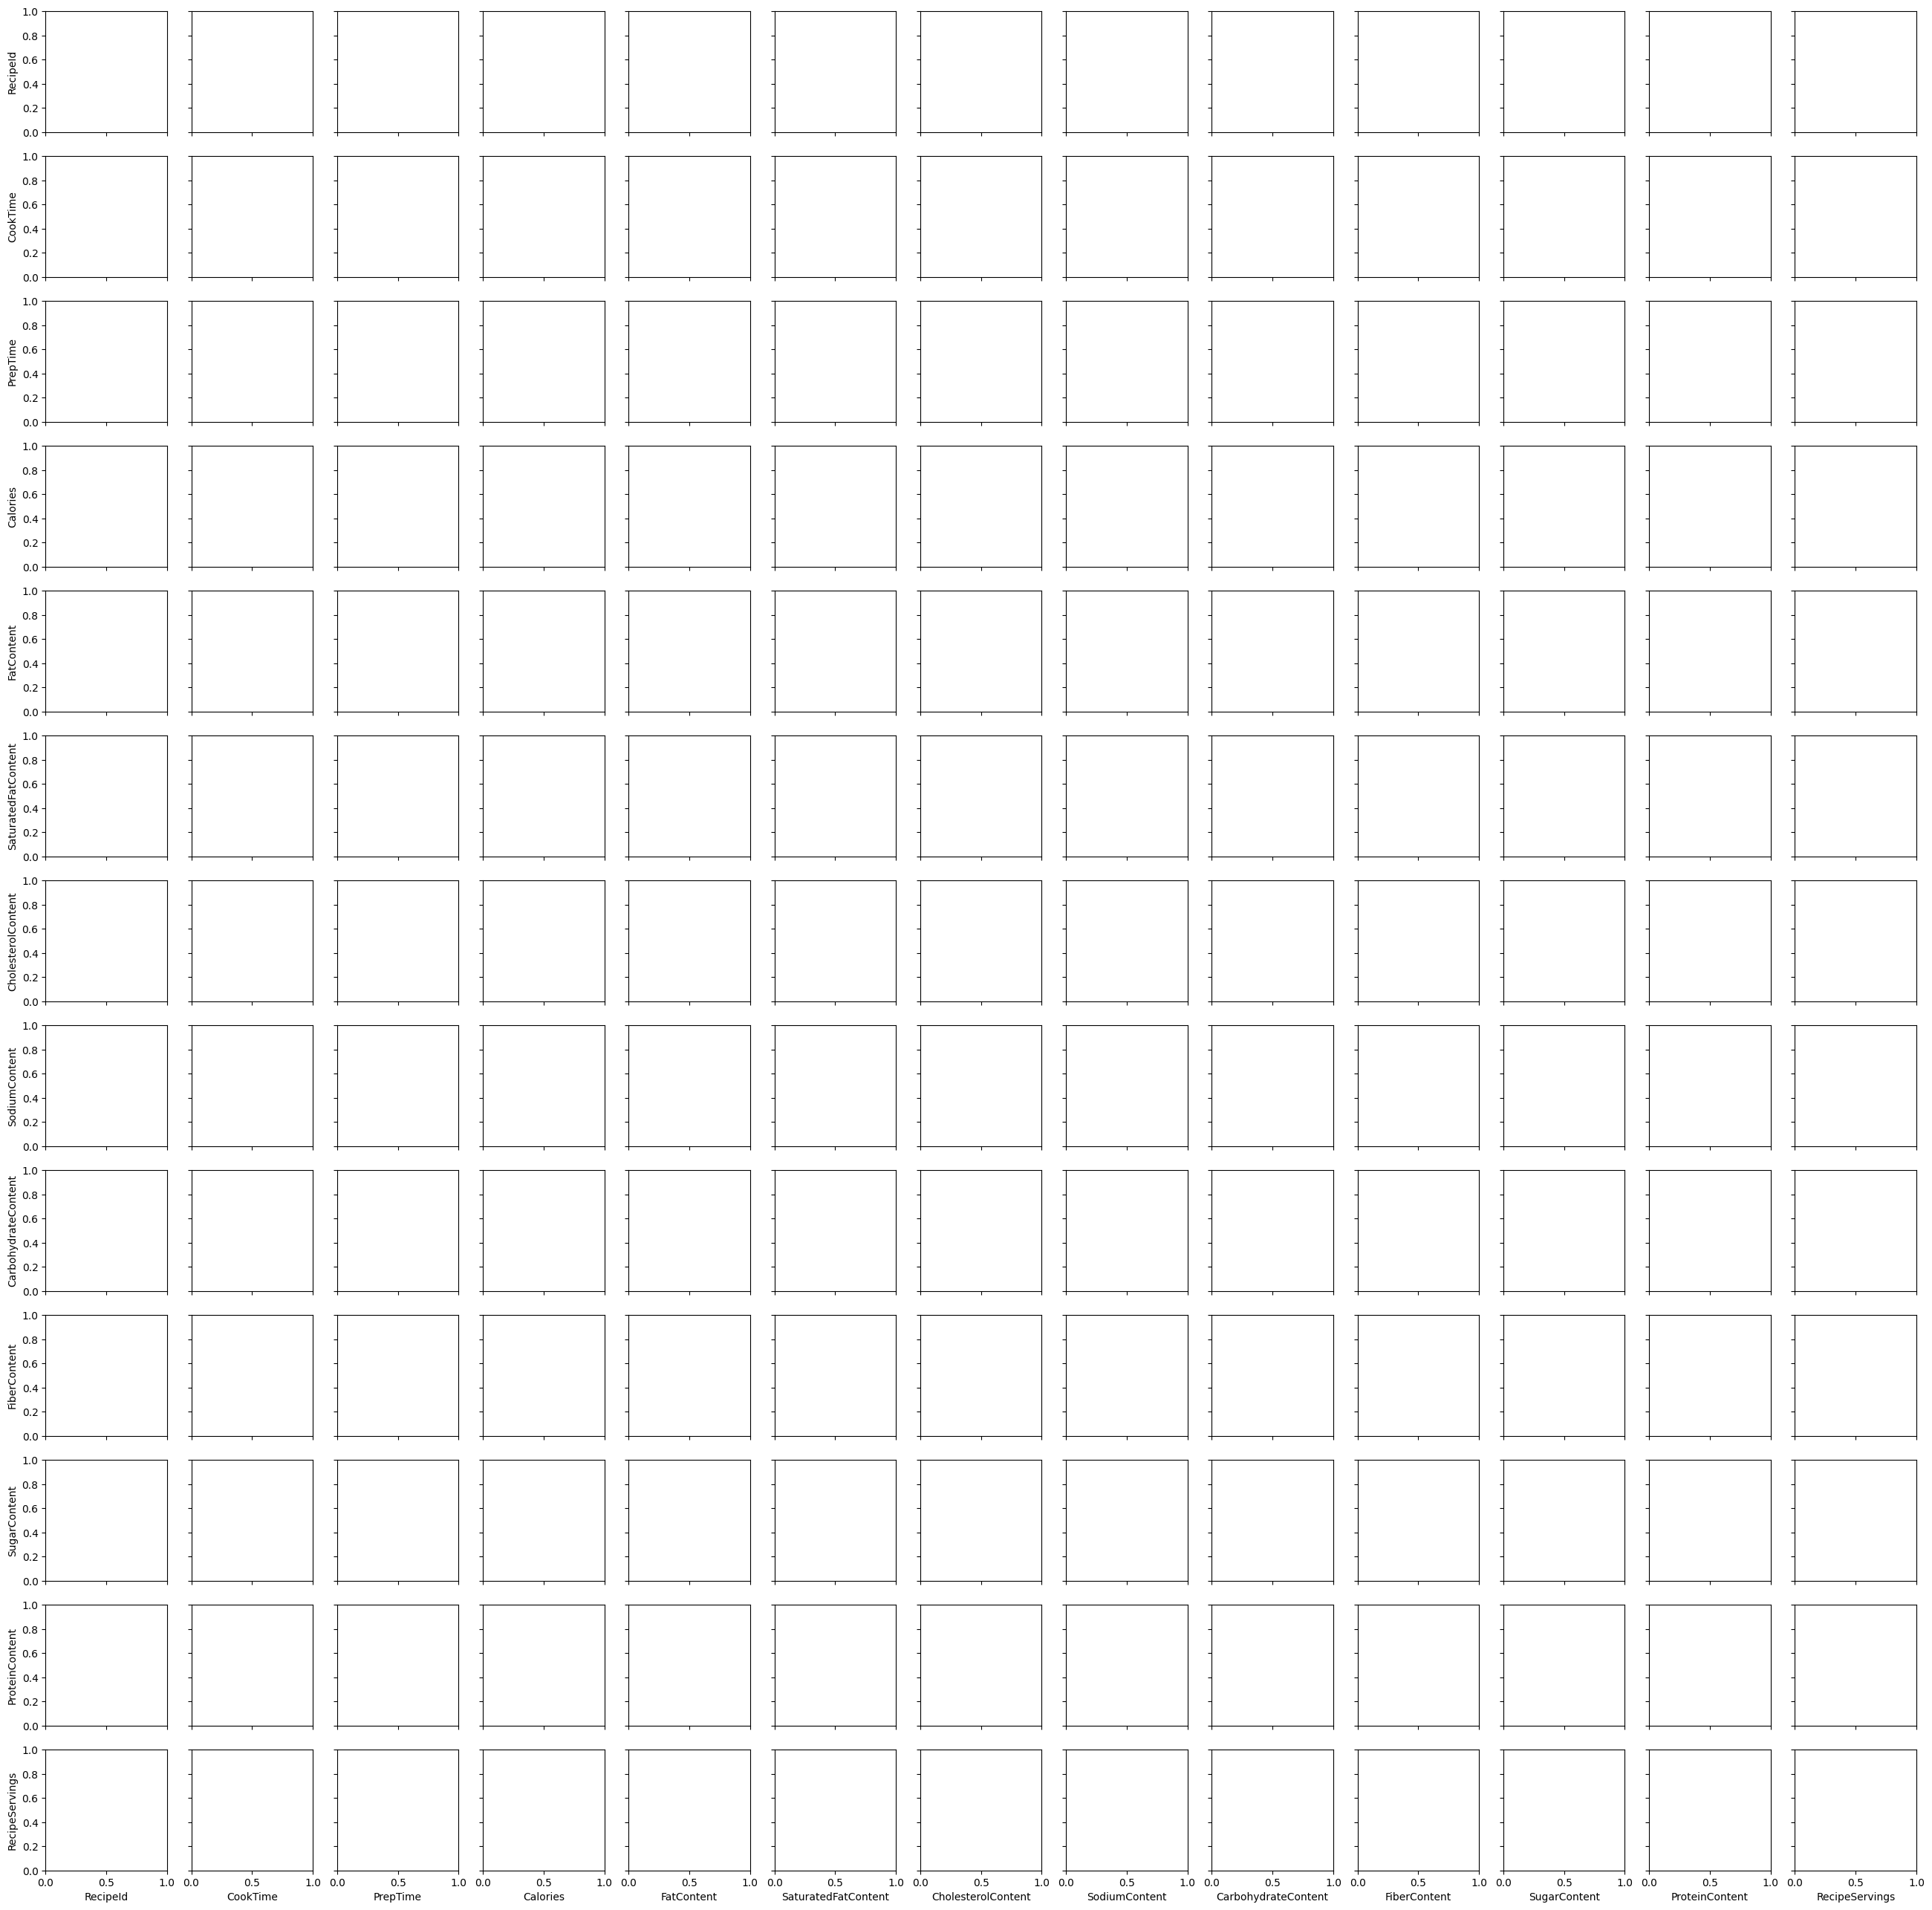

In [69]:
""" Use for final analysis when joined all tables. change variety -> Like """
# have a look at the feature distributions with a pairplot,
# as it gives you a good overview over possible outliers
# and a good overview over the data in general

# pairplot for the full data
sns.pairplot(df, hue="variety", diag_kind="hist", diag_kws={"multiple" : "stack"});

# -> looks like the dataset doesn't have any obvious extreme outliers, but maybe
# some points could still be considered outliers (depending on criteria)
# -> looks like "Versicolor" and "Virginica" are not linearly seperable

In [ ]:
""" Use for final analysis when joined all tables. change variety -> Like """
# look at class-dependent pairplots
df_grouped_by_class = df.groupby(by="variety")

df_setosa = df_grouped_by_class.get_group("Setosa")
df_versicolor = df_grouped_by_class.get_group("Versicolor")
df_virginica = df_grouped_by_class.get_group("Virginica")

class_labels = {
    "Setosa" : {
        "color" : "blue",
        "data" : df_setosa
    },
    "Versicolor" : {
        "color" : "green",
        "data" : df_versicolor
    },
    "Virginica" : {
        "color" : "red",
        "data" : df_virginica
    }
}

for class_i in class_labels:
    class_color = class_labels[class_i]["color"]
    class_df = class_labels[class_i]["data"]
    p = sns.pairplot(class_df, diag_kind="hist", diag_kws={"color" : class_color}, plot_kws={"color" : class_color, "label" : class_i})
    p.fig.suptitle(class_i, y=1.0, size=15)

In [ ]:
""" Use for final analysis when joined all tables."""

# We can also leverage the dataprep package to get a nice summary report
report = sv.analyze(df)
report.show_notebook()

# We can also leverage the yadata_profiling package to get a nice summary report
profile = ProfileReport(df, title="Iris Data - Summary Report")
profile

#### Summary: Data Understanding

You should have a good understanding what the data is about and of some of its properties. Newly gained insights are used to reiterate the
Business Understanding Phase, but in this example, it won't be necessary.

### Phase 3: Data Preparation

Data Preparation mainly consists of two parts, Data Cleaning and Data Wrangling. In Data
Cleaning, the goal is assure data quality. This includes removing wrong/corrupt 
data entries and making sure the entries are standardized, e.g. enforcing certain encodings. 
Data Wrangling then transforms the data in order to make it suitable for the modelling step.
Sometimes, steps from Data Wrangling are incorporated into the automatized Pipeline, as
we will show in this example.

#### Data Cleaning

Everything is properly named,the datatypes and encodings are consistent, there are no corrupt or missing values, transforming the feature dtype, etc.
On average, this step takes up to **80%** of the time of the whole project.

In [ ]:
# transform dtype

# fill/remove/change missing/corrupt values

# optionally save the cleaned datasets for versioning

#### Data Wrangling

In contrast to Data Cleaning, Data Wrangling _transforms_ the dataset, in order
to prepare it for the training of the models. This includes scaling, dimensionality
reduction, data augmentation, outlier removal, etc.

Again, this is just a toy example with an already cleaned data set. Thus, we are not 
going to demonstrate any specific data wrangling steps here. However, this is a very
tedious exercise in practice. 

In [ ]:
### data wrangling

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# data scaling
transform_scaler = StandardScaler()

# dimensionality reduction
transform_pca = PCA()

# value imputing

# outlier detection/removal

#### Sampling

Once we have a cleaned data set, and before we start the *Modelling* phase, we are going to split our data set into multiple sub-datasets. 
Here, we are going to split it into an *train* and *test* data set. Note that the split strongly depends on the underlying use-case
and used dataset.  

In [ ]:
# split data into learning and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(df.iloc[:, :-1], df.iloc[:, -1:],
                   test_size=0.3, 
                   shuffle=True,
                   random_state=3)


### Phase 4: Modeling

In this phase, the model is trained and tuned. In general, data transformations
from data wrangling can be part of a machine learning pipeline, and can therefore
be tuned as well. (See CRISP-DM: DataPrep <--> Modeling)

In [ ]:
# Here, you want to find the best classifier. As candidates, consider
#   1. LogisticRegression
#   2. RandomForestClassifier
#   3. other algorithms from sklearn (easy to add)
#   4. custom algorithms (more difficult to implement)
    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model_logistic_regression = LogisticRegression(max_iter=30)
model_random_forest = RandomForestClassifier()
model_gradient_boosting = GradientBoostingClassifier()

# train the models
pipeline = Pipeline(steps=[("scaler", transform_scaler), 
                           ("pca", transform_pca),
                           ("model", None)])

parameter_grid_preprocessing = {
  "pca__n_components" : [1, 2, 3, 4],
}

parameter_grid_logistic_regression = {
  "model" : [model_logistic_regression],
  "model__C" : [0.1, 1, 10],  # inverse regularization strength
}

parameter_grid_gradient_boosting = {
  "model" : [model_gradient_boosting],
  "model__n_estimators" : [10, 20, 30]
}

parameter_grid_random_forest = {
  "model" : [model_random_forest],
  "model__n_estimators" : [10, 20, 50],  # number of max trees in the forest
  "model__max_depth" : [2, 3, 4],
}

meta_parameter_grid = [parameter_grid_logistic_regression,
                       parameter_grid_random_forest,
                       parameter_grid_gradient_boosting]

meta_parameter_grid = [{**parameter_grid_preprocessing, **model_grid}
                       for model_grid in meta_parameter_grid]

search = GridSearchCV(pipeline,
                      meta_parameter_grid, 
                      scoring="balanced_accuracy",
                      n_jobs=2, 
                      cv=5,  # number of folds for cross-validation 
                      error_score="raise"
)

# here, the actual training and grid search happens
search.fit(X_train, y_train.values.ravel())

print("best parameter:", search.best_params_ ,"(CV score=%0.3f)" % search.best_score_)

### Step 5: Evaluation

Once the appropriate models are chosen, they are evaluated on the test set. For
this, different evaluation metrics can be used. Furthermore, this step is where
the models and their predictions are analyzed resp. different properties, including
feature importance, robustness to outliers, etc.

In [ ]:
# evaluate performance of model on test set
print("Score on test set:", search.score(X_test, y_test.values.ravel()))

# contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_test), y_test.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)

In [ ]:
# (optional, if you're curious) 
# for a detailed look on the performance of the different models
def get_search_score_overview():
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
      print(c, s)

print(get_search_score_overview())

#### Interpretability

##### Disclaimer: This only works if shap is installed.

In addition to models and their predictions, it is often important to understand _why_ a model makes certain predictions. 
There is a lot of literature on how this can be achieved (explainability), but we will only show the use of Shapley values
using the python module "shap", which is a combination of Shapley values and LIME. 
You can find more information on this topic [here](https://christophm.github.io/interpretable-ml-book/shap.html).

In [ ]:
# assume random forest model
model = RandomForestClassifier(n_estimators=10, random_state=seed)
model.fit(X_train, y_train.values.ravel())

# compute shapley values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_interaction_values = explainer.shap_interaction_values(X_train)

expected_value = explainer.expected_value
print(expected_value)

In [ ]:
# class dependent plots of shapley values for each feature
for i,c in enumerate(df.variety.unique()):
    shap.summary_plot(shap_values[i], X_train, show=False)
    plt.title("Shapley values for "+str(c))
    plt.show()

From the computed SHAP values, we can interpret that the *petal.width* has a positive impact on the output of the model 
if the feature value is moderate. For high aand low values, the impact is negative. The same observation
holds for *petal.length*. Besides, the impact of the *sepal.length* and *sepal.width* features are rather low. By impact on a 
the target, we model the probability that we classify that target. Thus, if *petal.width* is high, it is more likely
that we classify the data point as Versicolor.

### Step 6: Deployment

Now that you have chosen and trained your model, it is time to deploy it to your
clients system. 

In [ ]:
def micro_service_classify_iris(datapoint):
    
  # make sure the provided datapoints adhere to the correct format for model input

  # fetch your trained model
  model = search.best_estimator_

  # make prediction with the model
  prediction = model.predict(datapoint)

  return prediction


In [ ]:
# hypothetical new batch of flowers arrives
from scipy.stats import norm

amount_of_new_flowers = 9
df_flowers = pd.DataFrame(columns=df.columns.drop("variety"), index=range(1, amount_of_new_flowers+1))

for i in df_flowers.index:
  df_flowers.loc[i, "sepal.length"] = norm(loc=6, scale=2).rvs()
  df_flowers.loc[i, "sepal.width"] = norm(loc=3, scale=1).rvs()
  df_flowers.loc[i, "petal.length"] = norm(loc=3, scale=5).rvs()
  df_flowers.loc[i, "petal.width"] = norm(loc=2, scale=2).rvs()

# customer uses your micro service to determine the varieties
df_flowers["variety"] = micro_service_classify_iris(df_flowers)
print(df_flowers)

In the Analytics Cup, you need to export your prediction in a very specific output format. This is a csv file without an index and two columns, *id* and *prediction*. Note that the values in both columns need to be integer values, and especially in the *prediction* column either 1 or 0.

In [ ]:
# Let's assume that our id column is the index of the dataframe
output = pd.DataFrame(df_flowers.variety)
output['id'] = df_flowers.index
output = output.rename(columns={'variety': 'prediction'})
output = output.reindex(columns=["id", "prediction"])
output.to_csv('iris_prediction.csv', index=False)